## **0. Download dataset**

In [1]:
# https://drive.google.com/file/d/1qiUDDoYyRLBiKOoYWdFl_5WByHE8Cugu/view?usp=sharing
!gdown --id 1qiUDDoYyRLBiKOoYWdFl_5WByHE8Cugu

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qiUDDoYyRLBiKOoYWdFl_5WByHE8Cugu
To: /content/Auto_MPG_data.csv
100% 15.4k/15.4k [00:00<00:00, 25.5MB/s]


## **1. Import libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
random_state = 59
np.random.seed(random_state)
torch.manual_seed(random_state)
if torch.cuda.is_available():
    torch.cuda.manual_seed(random_state)

## **2. Read dataset**

In [3]:
dataset_path = '/content/Auto_MPG_data.csv'
dataset = pd.read_csv(dataset_path)
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
389,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1


## **3. Preprocessing data**

### **3.1. X, y split**

In [11]:
X = dataset.drop(['MPG'], axis=1).values
y = dataset['MPG'].values

In [10]:
X

array([[  8., 307., 130., ...,   0.,   0.,   1.],
       [  8., 350., 165., ...,   0.,   0.,   1.],
       [  8., 318., 150., ...,   0.,   0.,   1.],
       ...,
       [  4., 135.,  84., ...,   0.,   0.,   1.],
       [  4., 120.,  79., ...,   0.,   0.,   1.],
       [  4., 119.,  82., ...,   0.,   0.,   1.]])

In [12]:
y

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 19. ,
       16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. , 13. ,
       18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. , 27. ,
       26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. , 17. ,
       11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. , 22. ,
       21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. , 14. ,
       15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. , 18. ,
       18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. , 22. ,
       18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. , 15. ,
       24. , 20. , 11. , 20. , 19. , 15. , 31. , 26. , 32. , 25. , 16. ,
       16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. , 26. , 31. ,
       32. , 28. , 24. , 26. , 24. , 26. , 31. , 19

### **3.2. Train/val/test split**

In [14]:
val_size = 0.2
test_size = 0.125
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size = val_size,
    random_state = random_state,
    shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size = test_size,
    random_state = random_state,
    shuffle=is_shuffle)

In [15]:
print(f'Number of training samples: {X_train.shape[0]}')
print(f'Number of val samples: {X_val.shape[0]}')
print(f'Number of test samples: {X_test.shape[0]}')

Number of training samples: 273
Number of val samples: 79
Number of test samples: 40


### **3.3. Data Normalization**

In [16]:
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_val = normalizer.transform(X_val)
X_test = normalizer.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [17]:
X_train

tensor([[-0.8414, -1.0379, -1.0381,  ..., -0.4443,  1.9045, -1.2748],
        [ 0.3676,  0.3682,  0.2230,  ..., -0.4443, -0.5251,  0.7845],
        [-0.8414, -0.9165, -0.8980,  ..., -0.4443, -0.5251,  0.7845],
        ...,
        [ 1.5766,  1.3091,  1.3439,  ..., -0.4443, -0.5251,  0.7845],
        [ 0.3676,  0.4391, -0.3375,  ..., -0.4443, -0.5251,  0.7845],
        [ 0.3676,  0.6211, -0.0573,  ..., -0.4443, -0.5251,  0.7845]])

In [19]:
X_train.shape

torch.Size([273, 9])

In [20]:
y_train

tensor([46.6000, 18.6000, 32.1000, 33.8000, 20.0000, 30.0000, 19.0000, 17.5000,
        38.0000, 29.9000, 22.0000, 35.7000, 37.0000, 25.0000, 17.0000, 25.5000,
        37.7000, 20.5000, 29.8000, 28.0000, 14.0000, 22.0000, 25.0000, 24.0000,
        32.2000, 32.3000, 29.0000, 15.5000, 15.5000, 32.9000, 23.5000, 19.0000,
        13.0000, 15.0000, 36.0000, 22.0000, 31.3000, 14.0000, 21.0000, 20.0000,
        17.0000, 15.5000, 27.9000, 35.0000, 34.5000, 27.0000, 12.0000, 41.5000,
        26.0000, 17.5000, 32.7000, 15.0000, 23.9000, 36.0000, 17.7000, 19.0000,
        20.5000, 19.4000, 30.0000, 29.8000, 26.6000, 14.0000, 23.9000, 25.0000,
        32.4000, 18.0000, 23.0000, 11.0000, 19.0000, 20.2000, 22.0000, 15.0000,
        22.0000, 13.0000, 20.0000, 21.0000, 26.0000, 14.0000, 26.5000, 23.0000,
        28.0000, 23.0000, 43.1000, 33.5000, 33.0000, 18.2000, 18.0000, 14.0000,
        18.0000, 20.8000, 19.0000, 13.0000, 43.4000, 14.0000, 18.0000, 21.5000,
        28.0000, 16.2000, 12.0000, 22.00

In [23]:
len(X_train)

273

## **4. Create PyTorch DataLoader**

In [45]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [46]:
batch_size = 32
train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)
test_dataset = CustomDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

## **5. Build MLP network**

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class MLP(nn.Module):
#     def __init__(self, input_dims, hidden_dims, output_dims):
#         super(MLP, self).__init__()
#         self.linear1 = nn.Linear(input_dims, hidden_dims)
#         self.linear2 = nn.Linear(hidden_dims, hidden_dims)
#         self.out = nn.Linear(hidden_dims, output_dims)

#     def forward(self, x):
#         print(f"Input size: {x.size()}")  # In kích thước đầu vào
#         x = self.linear1(x)
#         print(f"After linear1: {x.size()}")
#         x = F.relu(x)
#         print(f"After ReLU1: {x.size()}")
#         x = self.linear2(x)
#         print(f"After linear2: {x.size()}")
#         x = F.relu(x)
#         print(f"After ReLU2: {x.size()}")
#         out = self.out(x)
#         print(f"After output layer: {out.size()}")
#         return out.squeeze(1)

# # Ví dụ với batch size = 4, input_dims = 10
# model = MLP(input_dims=10, hidden_dims=16, output_dims=1)
# input_tensor = torch.randn(4, 10)  # Batch size = 4, input_dims = 10
# output = model(input_tensor)
# print(f"Final output size: {output.size()}")


In [47]:
class MLP(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_dims, hidden_dims)
        self.linear2 = nn.Linear(hidden_dims, hidden_dims)
        self.out = nn.Linear(hidden_dims, output_dims)
    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        out = self.out(x)
        return out.squeeze(1)

In [48]:
X_train.shape[1]

9

In [49]:
input_dims = X_train.shape[1]
output_dims = 1
hidden_dims = 16
lr = 0.01
model =  MLP(input_dims, hidden_dims, output_dims).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

## **6. Training**

In [50]:
def r_squared(y_true, y_pred):
    y_true = torch.Tensor(y_true).to(device)
    y_pred = torch.Tensor(y_pred).to(device)
    ss_res = torch.sum((y_true - y_pred) ** 2)
    ss_tot = torch.sum((y_true - torch.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

In [51]:
epochs = 100
train_losses = []
val_losses = []
train_r2 = []
val_r2 = []
for epoch in range(epochs):
    train_loss = 0.0
    train_target = []
    val_target = []
    train_predict = []
    val_predict = []
    model.train()
    for X_samples, y_samples in train_loader:
        X_samples = X_samples.to(device)
        y_samples = y_samples.to(device)
        optimizer.zero_grad()
        outputs = model(X_samples)
        train_predict += outputs.tolist()
        train_target += y_samples.tolist()
        loss = criterion(outputs, y_samples)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    train_r2.append(r_squared(train_target, train_predict))
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_samples, y_samples in val_loader:
            X_samples = X_samples.to(device)
            y_samples = y_samples.to(device)
            outputs = model(X_samples)
            val_predict += outputs.tolist()
            val_target += y_samples.tolist()
            loss = criterion(outputs, y_samples)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    val_r2.append(r_squared(val_target, val_predict))
    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_loss:.3f}\tValidation loss: {val_loss:.3f}')


EPOCH 1:	Training loss: 477.894	Validation loss: 492.356

EPOCH 2:	Training loss: 421.281	Validation loss: 361.603

EPOCH 3:	Training loss: 303.247	Validation loss: 248.871

EPOCH 4:	Training loss: 136.107	Validation loss: 168.151

EPOCH 5:	Training loss: 38.177	Validation loss: 24.208

EPOCH 6:	Training loss: 33.608	Validation loss: 24.062

EPOCH 7:	Training loss: 23.179	Validation loss: 20.652

EPOCH 8:	Training loss: 22.507	Validation loss: 18.843

EPOCH 9:	Training loss: 20.117	Validation loss: 18.344

EPOCH 10:	Training loss: 18.586	Validation loss: 28.573

EPOCH 11:	Training loss: 21.820	Validation loss: 26.528

EPOCH 12:	Training loss: 17.813	Validation loss: 16.243

EPOCH 13:	Training loss: 19.519	Validation loss: 14.670

EPOCH 14:	Training loss: 16.712	Validation loss: 13.697

EPOCH 15:	Training loss: 14.913	Validation loss: 14.977

EPOCH 16:	Training loss: 13.964	Validation loss: 13.132

EPOCH 17:	Training loss: 13.738	Validation loss: 16.035

EPOCH 18:	Training loss: 13.199

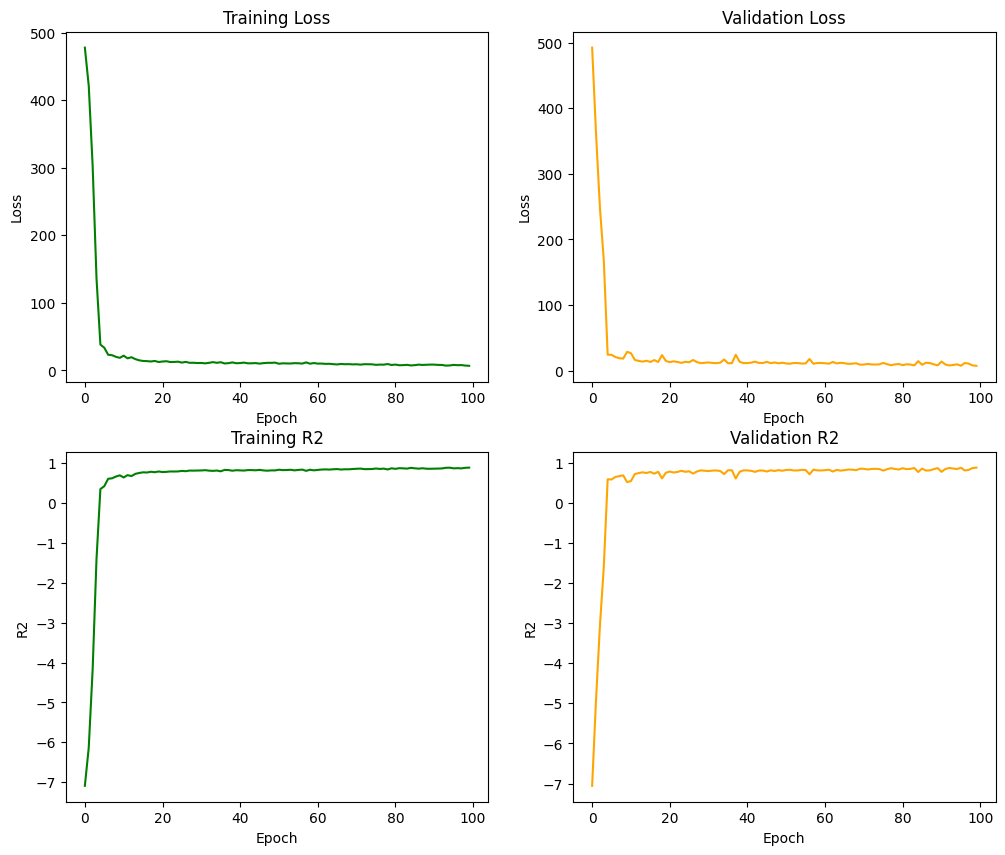

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses, color='green')
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, color='orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_r2, color='green')
ax[1, 0].set(xlabel='Epoch', ylabel='R2')
ax[1, 0].set_title('Training R2')

ax[1, 1].plot(val_r2, color='orange')
ax[1, 1].set(xlabel='Epoch', ylabel='R2')
ax[1, 1].set_title('Validation R2')

plt.show()

## **7. Evaluation**

In [53]:
model.eval()
with torch.no_grad():
    y_hat = model(X_val)
    val_set_r2 = r_squared(y_hat, y_val)
    print('Evaluation on validation set:')
    print(f'R2: {val_set_r2}')

Evaluation on validation set:
R2: 0.8622123599052429
